# Capstone Project - The Battle of the Neighborhoods 
### Yange Bian

## Table of contents
* Introduction
* Data
* Methodology
* Analysis
* Results and Discussion
* Conclusion

## Introduction: Business Problem
As one of the 50 largest cities in USA, **Boston is the home for many intellectuals, scholars and students from all over the world.** According to general statistics, Boston’s diversity index increased from 48.7 percent in 1980 to 70.2 percent in 2017, which indicates an above-average, 21.5 percentage point increase (Schuster and Ciurczak, 2018). More importantly, **the city of Boston remains home to the largest number of Asian Americans in the state (60,985) and neighborhoods in Greater Boston in 2016 had at least 4,000 Asian Americans.** Among Boston's neighborhoods, Dorchester has the most concentrated, flourishing Asian American communities, and their affluent economic businesses (Tanabe and Lo). In addition, because many colleges' off-campus housing are located around Back Bay, Fenway, Brookline, East Boston and Allston, these neighborhoods could have increasing number of Asian students and scholars. In this case, the local businesses would transform to accomodate those individuals' needs in order to get great profits. **One key indicator is the distribution of Asian restaurants in each neighborhood, since the restaurants types, quantities, locations, and popularity are always the true representation of the local neighrboods'culture, economic activity and ethnic diversity.**

Multiple data sources, data analysis tools and clustering algorithm will be used to explore the distribution of Asian restaurants in Boston neighborhoods and to analyze which neighborhoods are more embracing for Asian restaurants and Asian American communities. In other words, this report will help answer the following questions: 

1. Where should I open an Asian restaurants to have the best chances of getting profits? Or what is the most popular neighborhood location for Asian cuisine or eatery?
2. What Asian restaurants have the highest rating and where are they located? Do they also locate in those popular neighborhoods?
3. To what extent does the distribution of Asian restaurants represent the local economic activites? Explore the other top venue/businesses categories in those popular neighborhoods where these Asian restaurants are located.

**Target Audience**

For any business personnel or local Asian immigrant family who wants to invest or open a restaurant in Boston, this analysis will be a comprehensive guide to start or expand restaurants of Asian cuisine in terms of local environment and economic/commerical activities.
For freelancer who loves to open restaurant as part-time business. this analysis will give an idea, how beneficial it is to open a restaurant in nearby neighborhood.
For Asian American individuals such as students,scholars or family who wants to find ideal option for dining, this analysis will certainly provide the most accurate information for geospatial distribution of restaurants and their ratings. 

## Data 
In order to answer the above research problems, data on Boston neighborhoods, including boundaries, latitude, longitude, restaurants, and restaurant ratings and tips are required.

Boston neighborhoods, boundaries, latitudes and longitudes will be obtained from the data source via **geojson file**: https://data.boston.gov/dataset/boston-neighborhoods/resource/13ee2b65-6547-4168-b112-83995f138602

**Foursquare API** will be used to locate all venues and filtered by Asian restaurants(i.e. Chinese, Japanese, Korean, Indian, Thai, Vietnamese, Asian Fusion, etc) via using search, explore or trending queries. Locations/neighborhoods, ratings, tips and likes for each restaurant will be counted, merged and added to a dataframe.

Data will be organized, sorted, and analyzed based on ratings and neighborhoods into clean dataframes. These dataframes will be showcased and visualized in different types of plots. descriptive statistics will be used and analyzed for ratings or likes to identify popular neighborhood and top venue categories.

Most importantly, the cleaned dataframes with venue information will be used to create geospatial visualizations to assess the local distribution of Asian American restaurants and neighborhoods, and to build K-means clustering model to better answer the research problems.

### Data Preparation
In the preparation phase, we will load and extract from the original geographical data, and create, clean and view the full dataframes. Initial geospatial visualization will also be created as a general overview of the local neighborhoods.


First, we need to load all the necessary python libraries.

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


Now, since I downloaded the geojson file on my local desktop, I loaded the local data and saved it to a named object(boston_data) called boston_data. Note that this object will be used for **indexing** to extract and create the first dataframe for neighborhood geospatial information.

In [527]:
f=open('/Users/yangebian/Desktop/projects/Boston_Neighborhoods.geojson','r')
boston_data=json.loads(f.read())

We extract the neighborhood geospatial data by indexing 'features' from the object boston_data, and name the extracted data as a new object, neighborhoods_data.

In [40]:
neighborhoods_data = boston_data['features']

A new pandas dataframe called 'neighborhoods' is created and the attributes/columns are named correspondingly. There are 3 attributes necessary for now: 'Neighborhood', 'Latitude', 'Longitude'.

In [68]:
# define the dataframe columns
column_names = ['Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Neighborhood,Latitude,Longitude


The for-loop is used to extract the neighborhood name(strings), lattitude and longitude(numeric data itself) from the dictionaries and lists stored in neighborhoods_data.

In [69]:
for data in neighborhoods_data:
    neighborhood_name = data['properties']['Name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[0][0][1]
    neighborhood_lon = neighborhood_latlon[0][0][0]
    
    neighborhoods = neighborhoods.append({'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

The full dataframe called 'neighborhoods' is initially displayed as below:

In [70]:
neighborhoods.head(100)


,Neighborhood,Latitude,Longitude
0,Roslindale,"[-71.12610933458738, 42.2716219294518]","[-71.12592717485386, 42.272013107957406]"
1,Jamaica Plain,42.3261,-71.105
2,Mission Hill,42.3358,-71.0904
3,Longwood,42.3367,-71.0981
4,Bay Village,42.3488,-71.0666
5,Leather District,42.3498,-71.0584
6,Chinatown,42.3524,-71.0579
7,North End,42.3688,-71.052
8,Roxbury,42.2932,-71.0965
9,South End,42.3478,-71.0683


We count and identify the neighborhoods by calling the built-in function len( ) and unique( ).

In [71]:
len(neighborhoods['Neighborhood'].unique())

26

In [72]:
neighborhoods['Neighborhood'].unique()

array(['Roslindale', 'Jamaica Plain', 'Mission Hill', 'Longwood',
       'Bay Village', 'Leather District', 'Chinatown', 'North End',
       'Roxbury', 'South End', 'Back Bay', 'East Boston', 'Charlestown',
       'West End', 'Beacon Hill', 'Downtown', 'Fenway', 'Brighton',
       'West Roxbury', 'Hyde Park', 'Mattapan', 'Dorchester',
       'South Boston Waterfront', 'South Boston', 'Allston',
       'Harbor Islands'], dtype=object)

From the above dataframe, several rows/neighborhoods still have uncleaned geographical data. These neighborhoods are Rosindale, Charlestown, West End, Dorchester and Harbor Islands. The problem is that their lattitude and longitude are lists, not numbers. The lists are all replicated and redundant including numbers for both metrics.

In this case, I created and applied the following for-loop to locate the rows, and extract and assign the numbers back into the dataframe.

In [73]:
for i in neighborhoods.index:
    if neighborhoods['Neighborhood'][i]=='Roslindale':
        neighborhoods['Latitude'][i]=neighborhoods['Longitude'][i][1]
        neighborhoods['Longitude'][i]=neighborhoods['Longitude'][i][0]
    elif neighborhoods['Neighborhood'][i]=='Charlestown':
        neighborhoods['Latitude'][i]=neighborhoods['Longitude'][i][1]
        neighborhoods['Longitude'][i]=neighborhoods['Longitude'][i][0]
    elif neighborhoods['Neighborhood'][i]=='West End':
        neighborhoods['Latitude'][i]=neighborhoods['Longitude'][i][1]
        neighborhoods['Longitude'][i]=neighborhoods['Longitude'][i][0]
    elif neighborhoods['Neighborhood'][i]=='Dorchester':
        neighborhoods['Latitude'][i]=neighborhoods['Longitude'][i][1]
        neighborhoods['Longitude'][i]=neighborhoods['Longitude'][i][0]
    elif neighborhoods['Neighborhood'][i]=='Harbor Islands':
        neighborhoods['Latitude'][i]=neighborhoods['Longitude'][i][1]
        neighborhoods['Longitude'][i]=neighborhoods['Longitude'][i][0]
neighborhoods.head(30)

,Neighborhood,Latitude,Longitude
0,Roslindale,42.272,-71.1259
1,Jamaica Plain,42.3261,-71.105
2,Mission Hill,42.3358,-71.0904
3,Longwood,42.3367,-71.0981
4,Bay Village,42.3488,-71.0666
5,Leather District,42.3498,-71.0584
6,Chinatown,42.3524,-71.0579
7,North End,42.3688,-71.052
8,Roxbury,42.2932,-71.0965
9,South End,42.3478,-71.0683


Note that Allston and Brighton are exactly the overlapped neighborhood area with the same lattitude and longitude. We will need to keep one of them to avoid unnecessary data replication. As Bostonian, we usually refer to that neighborhood area as 'Allston/Brighton', and rarely separate them.

In [74]:
neighborhoods.drop(neighborhoods.index[17],inplace=True) #remove Brighton from neighborhoods
neighborhoods.reset_index(drop=True,inplace=True)
neighborhoods

,Neighborhood,Latitude,Longitude
0,Roslindale,42.272,-71.1259
1,Jamaica Plain,42.3261,-71.105
2,Mission Hill,42.3358,-71.0904
3,Longwood,42.3367,-71.0981
4,Bay Village,42.3488,-71.0666
5,Leather District,42.3498,-71.0584
6,Chinatown,42.3524,-71.0579
7,North End,42.3688,-71.052
8,Roxbury,42.2932,-71.0965
9,South End,42.3478,-71.0683


After removing 'Brighton', we have almost cleaned dataframe with a total of 25 neighborhoods.

In [75]:
print('The dataframe has {} neighborhoods.'.format(
        neighborhoods.shape[0]
    )
)

The dataframe has 25 neighborhoods.


After converting the metrics attributes (Lattitude and Longitude) from strings into float type, we have the **cleaned** dataframe for neighborhood geographical information.

In [76]:
neighborhoods['Latitude']=neighborhoods['Latitude'].astype('float')


In [77]:
neighborhoods['Longitude']=neighborhoods['Longitude'].astype('float')

In [78]:
neighborhoods.dtypes

Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

geolocator.geocode is used to locate the extract geographical location for the center of Boston. We stored the centric location's latitude and longitude into two variables, 'latitude' and 'longitude'.

In [79]:
address = 'Boston, MA'

geolocator = Nominatim(user_agent="bos_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Boston are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Boston are 42.3602534, -71.0582912.


We used the latitude and longitude variables to locate folium.Map(the tool we use for geospatial visualization). Then we used for-loop for browsing through the cleaned dataframe(neighborhoods) to locate and create labels for each neighborhood so that each location can be easily viewed as single blue dot on the map

In [80]:
# create map of Boston using latitude and longitude values
map_boston = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_boston)  
 
    

Apply the following code to safely view the geospatial visualization.

In [81]:
from IPython.core.display import HTML
iframe = map_boston._repr_html_()
display(HTML(iframe))

### Foursquare API Application and Functions
The following functions are created and used to retrieve geographical information of each local Asian restaurant (get_venues) and ratings, likes and tips of each restaurant from Foursquare online database.

In [136]:
CLIENT_ID = 'WCI0AWVKMC1E4MZ4WLPZHPVVJNOUGZ5X2SKVZHXAPJ0OXZZH' # my Foursquare ID
CLIENT_SECRET = 'SRMB0ORMDLS10A42QFIM1PMMGN20UCNOTZCSHU5BULU0CDVB' # my Foursquare Secret
VERSION = '20200724' # Foursquare API version


def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    LIMIT=2000
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,  
            LIMIT)
    # get all the data 
    venue_data=requests.get(url).json()["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

Asian restaurants correspond to the major Asian cuisine as the venue categories: Chinese, Japanese, Korean, Indian, Thai, Vietnamese, and Afghan Restaurants.
Now a new dataframe called asian_rest is created to include all Asian restaurants' names, venue_ID and neighborhood.

In [83]:
column_names=['Neighborhood', 'ID','Name']
asian_rest=pd.DataFrame(columns=column_names)
for row in neighborhoods.values.tolist():
    Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    asian_restaurants=venues[venues['Category']=='Chinese Restaurant']
    asian_restaurants1=venues[venues['Category']=='Japanese Restaurant']
    asian_restaurants2=venues[venues['Category']=='Korean Restaurant']
    asian_restaurants3=venues[venues['Category']=='Indian Restaurant']
    asian_restaurants4=venues[venues['Category']=='Thai Restaurant']
    asian_restaurants5=venues[venues['Category']=='Vietnamese Restaurant']
    asian_restaurants6=venues[venues['Category']=='Asian Restaurant']
    asian_restaurants7=venues[venues['Category']=='Sushi Restaurant']
    asian_restaurants8=venues[venues['Category']=='Afghan Restaurant']
    for restaurant_detail in asian_restaurants.values.tolist():
        id, name , category=restaurant_detail
        asian_rest = asian_rest.append({'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    for restaurant_detail1 in asian_restaurants1.values.tolist():
        id, name , category=restaurant_detail1
        asian_rest = asian_rest.append({'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    for restaurant_detail2 in asian_restaurants2.values.tolist():
        id, name , category=restaurant_detail2
        asian_rest = asian_rest.append({'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    for restaurant_detail3 in asian_restaurants3.values.tolist():
        id, name , category=restaurant_detail3
        asian_rest = asian_rest.append({'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    for restaurant_detail4 in asian_restaurants4.values.tolist():
        id, name , category=restaurant_detail4
        asian_rest = asian_rest.append({'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    for restaurant_detail5 in asian_restaurants5.values.tolist():
        id, name , category=restaurant_detail5
        asian_rest = asian_rest.append({'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    for restaurant_detail6 in asian_restaurants6.values.tolist():
        id, name , category=restaurant_detail6
        asian_rest = asian_rest.append({'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    for restaurant_detail7 in asian_restaurants7.values.tolist():
        id, name , category=restaurant_detail7
        asian_rest = asian_rest.append({'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    for restaurant_detail8 in asian_restaurants8.values.tolist():
        id, name , category=restaurant_detail8
        asian_rest = asian_rest.append({'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)

Because running and calling Foursquare API is time-consuming everytime, I save the data information into a local csv file as a shortcut so that I can access the data directly.

In [84]:
asian_rest.to_csv('asian_rest.csv')

The first 50 rows of dataframe is displayed below

In [85]:
asian_rest=pd.read_csv('asian_rest.csv')
asian_rest.head(50)

,Unnamed: 0,Neighborhood,ID,Name
0,0,Roslindale,4b6caefaf964a520f04b2ce3,Misono
1,1,Roslindale,4a9dd1d2f964a520853920e3,Himalayan Bistro
2,2,Roslindale,50ef8d5c8acaed20c6c6c271,Shanti Taste of India Roslindale
3,3,Roslindale,4b107ba4f964a520687123e3,Phuket
4,4,Roslindale,4fc54e6ce4b0a6258efafba9,Banh Mi NGON
5,5,Jamaica Plain,4cb6134055af224b0a37977e,Lucky Boston Chinese
6,6,Jamaica Plain,4ae64951f964a52037a621e3,Food Wall
7,7,Jamaica Plain,4b6330bef964a52065692ae3,Yokohama Sushi
8,8,Mission Hill,4c045647310fc9b64534c761,Sunrise Chinese Food
9,9,Mission Hill,4a954ec2f964a520e52220e3,Thaitation


In [102]:
asian_rest.shape

(168, 3)

In [370]:
print('The dataframe has {} rows and {} columns.'.format(asian_rest.shape[0],asian_rest.shape[1]))

The dataframe has 168 rows and 3 columns.


Now we need to **remove** the 1st column, which is consisted of the repeated row index.

In [87]:
asian_rest=asian_rest.iloc[:,1:]

In [371]:
asian_rest.head(50)

,Neighborhood,ID,Name
0,Roslindale,4b6caefaf964a520f04b2ce3,Misono
1,Roslindale,4a9dd1d2f964a520853920e3,Himalayan Bistro
2,Roslindale,50ef8d5c8acaed20c6c6c271,Shanti Taste of India Roslindale
3,Roslindale,4b107ba4f964a520687123e3,Phuket
4,Roslindale,4fc54e6ce4b0a6258efafba9,Banh Mi NGON
5,Jamaica Plain,4cb6134055af224b0a37977e,Lucky Boston Chinese
6,Jamaica Plain,4ae64951f964a52037a621e3,Food Wall
7,Jamaica Plain,4b6330bef964a52065692ae3,Yokohama Sushi
8,Mission Hill,4c045647310fc9b64534c761,Sunrise Chinese Food
9,Mission Hill,4a954ec2f964a520e52220e3,Thaitation


Now let's check the each neighborhood's name and the total number of neighborhoods.

In [89]:
asian_rest['Neighborhood'].unique()

array(['Roslindale', 'Jamaica Plain', 'Mission Hill', 'Longwood',
       'Bay Village', 'Leather District', 'Chinatown', 'Roxbury',
       'South End', 'Back Bay', 'East Boston', 'Charlestown',
       'Beacon Hill', 'Fenway', 'West Roxbury', 'Hyde Park', 'Mattapan',
       'Dorchester', 'South Boston Waterfront', 'South Boston', 'Allston',
       'Harbor Islands'], dtype=object)

In [90]:
len(asian_rest['Neighborhood'].unique()) 

22

Please note that among total of 25 neighborhoods, **22 neighborhoods have asian restaurants.**

## Methodology

In this project, we will direct our effort on **identifying neighborhoods that are suitable for opening Asian restaurants**. To take a business approach, the solution could be polarized. **On one hand, the neighborhoods crowded with highly rated restaurants could be welcoming but competitive for opening a new restaurant**. On the other hand, the neighborhoods with less restaurants could be more welcoming for investing a new restaurant, which could also remain risky. Nonetheless, it is more likely that **the neighborhoods with low average ratings for Asian restaurants could reflect the local preferences for the other types of cuisine**. In the analysis, we will examine the neighborhoods based on the ratings for Asian restaurants to evaluate these assumptions before finalizing a business recommendation.

In first step, we have **created cleaned dataframe for geographical information for neighborhoods and all available Asian restaurants.**

In second step, we will include **exploratory data analysis with descriptive statistics and basic visualizations** to show the **frequency distribution of Asian restaurants among neighborhoods** and to identify the potential popular neighborhoods. More importantly, **cleaned dataframes for neighborhoods with restaurants ratings/likes/tips will be created and analyzed.** Note that the restaurants with the highest ratings/likes/tips will also be identified. The main geospatial visualization tool will be **Folium map and heatmap** to display ratings with each neighborhood, and **locate the populated regions for Asian restaurants**.

In third and final step, we will separate the neighborhoods based on ratings and analyze their top venues to evaluate the business decision for opening a local Asian restaurant. Among the neighborhoods with **highly rated restaurants, the machine learning algorithm, k-means clustering**, will be used to further cluster the neighborhoods in order to **identify the most ideal group of neighborhoods** for opening an Asian restaurant. We will create a **folium map to display the clusters as well**.

If the neighborhoods have **low rated Asian restaurants but their top venues are other type of restaurants**, they shouldn't be the choices for opening Asian restaurants and **no further analysis would be done**. And if the neighborhoods have **low rated Asian restaurants and their top venues are not restaurants-related**, opening Asian restaurant would be less competitive and possibly profittable. In this case, **further exploration could be done.**




## Analysis

Let's first conduct the exploratory data analysis for the frequency of Asian restaurants in each neighborhood.
Now we import matplotlib and use ggplot as the style.

In [121]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('ggplot')

To retrieve the count of restaurants, we will group by each neighborhood. Note that asian_rest is our cleaned dataframe with ALL available Asian restaurants.

In [122]:
num=asian_rest.groupby('Neighborhood').count()
num.reset_index(inplace=True)
num

,Neighborhood,ID,Name
0,Allston,18,18
1,Back Bay,1,1
2,Bay Village,13,13
3,Beacon Hill,7,7
4,Charlestown,4,4
5,Chinatown,23,23
6,Dorchester,4,4
7,East Boston,6,6
8,Fenway,6,6
9,Harbor Islands,10,10


After group by, either ID or Name column doesn't matter. Either column represents the count.

Now let's create a bar plot to display the count of Asian restaurants for each neighborhood.

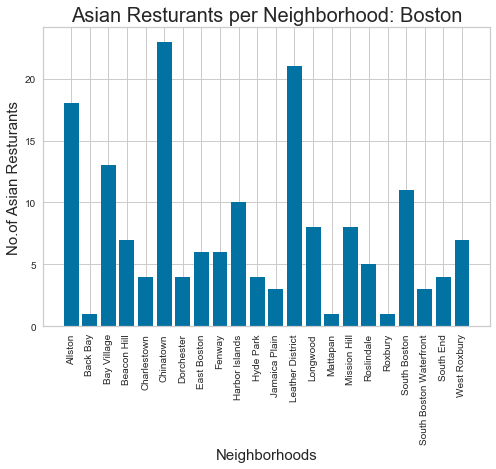

<Figure size 1600x1200 with 0 Axes>

In [366]:
plt.bar(num['Neighborhood'], num['ID'])
plt.title('Asian Resturants per Neighborhood: Boston', fontsize = 20)
plt.xlabel('Neighborhoods', fontsize = 15)
plt.ylabel('No.of Asian Resturants', fontsize=15)
plt.xticks(rotation = 'vertical')
figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k')
plt.show()

From the bar graph, we can easily see that some neighborhoods have much higher number of restaurants than most others. To clarify these neighborhoods, we sort/rank and identify them.

In [526]:
#Graph the top 5 neighborhoods
numm=asian_rest.groupby('Neighborhood').count()['ID'].nlargest()
numm

Neighborhood
Chinatown           23
Leather District    21
Allston             18
Bay Village         13
South Boston        11
Name: ID, dtype: int64

Now we get the top 5 neighborhoods with the majority number of Asian restaurants. Let's graph them on a bar plot.

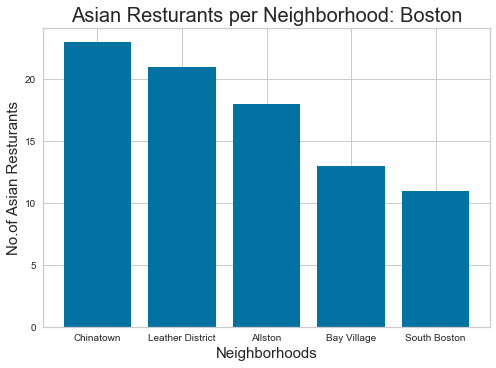

<Figure size 1600x1200 with 0 Axes>

In [368]:
plt.bar(numm.index, numm)
plt.title('Asian Resturants per Neighborhood: Boston', fontsize = 20)
plt.xlabel('Neighborhoods', fontsize = 15)
plt.ylabel('No.of Asian Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k')
plt.show()

This bar plot highlights the neighborhoods crowded with Asian restaurants. In other words, opening an Asian restaurants in these regions might seem satisfying but competitive in terms of available limited resources/customers. 

Now let's analyze the neighborhoods with restaurants ratings/likes/tips, the important metrics for customer feedback, to evaluate any possible business recommendation.

We first created a dataframe to include all the neighborhood, and restaurant's venue ID, name, rating and tips.
By calling get_venue_details function, we will call Foursquare API to return every venue details for each restaurant.

In [528]:

column_names=['Neighborhood', 'ID','Name','Likes','Rating','Tips']
asian_rest_details=pd.DataFrame(columns=column_names)
for row in asian_rest.values.tolist():
    Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    asian_rest_details = asian_rest_details.append({'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)


{'meta': {'code': 200, 'requestId': '5f2674b1f773f578f1b893aa'}, 'response': {'venue': {'id': '4b6caefaf964a520f04b2ce3', 'name': 'Misono', 'contact': {'phone': '6173259919', 'formattedPhone': '(617) 325-9919'}, 'location': {'address': '669 Vfw Pkwy', 'lat': 42.29599116212758, 'lng': -71.15702733145645, 'labeledLatLngs': [{'label': 'display', 'lat': 42.29599116212758, 'lng': -71.15702733145645}], 'postalCode': '02467', 'cc': 'US', 'city': 'Chestnut Hill', 'state': 'MA', 'country': 'United States', 'formattedAddress': ['669 Vfw Pkwy', 'Chestnut Hill, MA 02467', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/misono/4b6caefaf964a520f04b2ce3', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Japanese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1d2941735', 'name': 'Sushi Restaurant', 'pluralName': 'Sus

KeyError: 'venue'

In [529]:
asian_rest_details.dtypes

Neighborhood     object
ID               object
Name             object
Likes            object
Rating          float64
Tips             object
dtype: object

We need to change likes/rating/tips into float from strings.

In [140]:
asian_rest_details['Likes']=asian_rest_details['Likes'].astype('float64')
asian_rest_details['Rating']=asian_rest_details['Rating'].astype('float64')
asian_rest_details['Tips']=asian_rest_details['Tips'].astype('float64')

In [141]:
asian_rest_details.dtypes

Neighborhood     object
ID               object
Name             object
Likes           float64
Rating          float64
Tips            float64
dtype: object

In [142]:
asian_rest_details

,Neighborhood,ID,Name,Likes,Rating,Tips
0,Roslindale,4b6caefaf964a520f04b2ce3,Misono,20.0,7.2,10.0
1,Roslindale,4a9dd1d2f964a520853920e3,Himalayan Bistro,26.0,7.5,18.0
2,Roslindale,50ef8d5c8acaed20c6c6c271,Shanti Taste of India Roslindale,18.0,7.1,11.0
3,Roslindale,4b107ba4f964a520687123e3,Phuket,8.0,7.7,9.0
4,Roslindale,4fc54e6ce4b0a6258efafba9,Banh Mi NGON,5.0,7.3,7.0
5,Jamaica Plain,4cb6134055af224b0a37977e,Lucky Boston Chinese,6.0,7.1,4.0
6,Jamaica Plain,4ae64951f964a52037a621e3,Food Wall,8.0,6.3,9.0
7,Jamaica Plain,4b6330bef964a52065692ae3,Yokohama Sushi,5.0,7.6,7.0
8,Mission Hill,4c045647310fc9b64534c761,Sunrise Chinese Food,7.0,7.5,2.0
9,Mission Hill,4a954ec2f964a520e52220e3,Thaitation,67.0,8.6,27.0


In [143]:
asian_rest_details.shape 

(168, 6)

In [144]:
asian_rest_details.to_csv('asian_rest_details.csv') 

To set up an access shortcut, we save the data into a csv file so that we don't need to call foursquare API every time.

In [151]:
#NO need to run foursquare API for accessing the data
asian_rest_details=pd.read_csv('asian_rest_details.csv')

In [152]:
asian_rest_details['Neighborhood'].unique()

array(['Roslindale', 'Jamaica Plain', 'Mission Hill', 'Longwood',
       'Bay Village', 'Leather District', 'Chinatown', 'Roxbury',
       'South End', 'Back Bay', 'East Boston', 'Charlestown',
       'Beacon Hill', 'Fenway', 'West Roxbury', 'Hyde Park', 'Mattapan',
       'Dorchester', 'South Boston Waterfront', 'South Boston', 'Allston',
       'Harbor Islands'], dtype=object)

The SAME number of neighborhoods are returned. This means that the neighborhoods with Asian restaurants ALL have available customer feedback.

In [153]:
len(asian_rest_details['Neighborhood'].unique())

22

The descriptive statistics for likes, rating and tips are provided.
The average likes, rating and tips are 44.5, 7.9 and 20.5.
The maximum are 449, 9.2 and 210. 

Now we are interested in the restaurants that have the maximum value, and their neighborhoods might be useful for subsequent analysis.

In [154]:
asian_rest_details.describe()

,Unnamed: 0,Likes,Rating,Tips
count,168.000000,168.000000,168.000000,168.000000
mean,83.500000,78.202381,7.847619,34.363095
std,48.641546,94.345813,0.566421,41.791674
min,0.000000,4.000000,6.300000,0.000000
25%,41.750000,18.000000,7.500000,9.000000
50%,83.500000,44.500000,7.900000,20.500000
75%,125.250000,102.000000,8.200000,41.000000
max,167.000000,449.000000,9.200000,210.000000


In [155]:
asian_rest_details.iloc[asian_rest_details['Likes'].idxmax()]

Unnamed: 0                            24
Neighborhood                 Bay Village
ID              49cf760ff964a520a95a1fe3
Name                       Myers + Chang
Likes                                449
Rating                               8.6
Tips                                 210
Name: 24, dtype: object

In [156]:
asian_rest_details.iloc[asian_rest_details['Rating'].idxmax()]

Unnamed: 0                           107
Neighborhood                      Fenway
ID              51703b83e4b06748d3b28952
Name               Gyu-Kaku Japanese BBQ
Likes                                188
Rating                               9.2
Tips                                  27
Name: 107, dtype: object

In [157]:
asian_rest_details.iloc[asian_rest_details['Tips'].idxmax()]

Unnamed: 0                            24
Neighborhood                 Bay Village
ID              49cf760ff964a520a95a1fe3
Name                       Myers + Chang
Likes                                449
Rating                               8.6
Tips                                 210
Name: 24, dtype: object

The same restaurant from Bay Village appears twice. Remember that Bay Village is one of the top neighborhoods that has the most number of Asian restaurants. On the other hand, Fenway is not one of the top neighborhoods. But its restaurant has the highest rating suggesting that the lack of competitors might improve customer feedback and economic profitability.

**Further analysis will be done in terms of the average rating.**

In [163]:
neighborhood_stats=asian_rest_details.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
neighborhood_stats.columns=['Neighborhood','Average Rating']
top_neighborhoods=neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(6)
neighborhood_stats

,Neighborhood,Average Rating
0,Allston,8.066667
1,Back Bay,8.100000
2,Bay Village,8.269231
3,Beacon Hill,7.914286
4,Charlestown,8.150000
5,Chinatown,7.756522
6,Dorchester,7.525000
7,East Boston,7.816667
8,Fenway,8.000000
9,Harbor Islands,7.660000


Due to the high rating for particular restaurants, Fenway seems to have fairly high average ratings(8.0).

Now let's create a bar graph to identify the neighborhoods with top ratings.

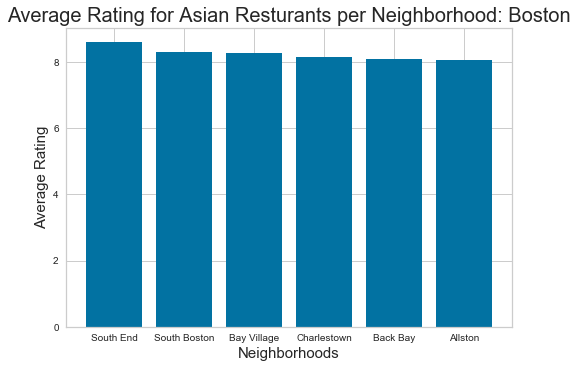

<Figure size 1600x1200 with 0 Axes>

In [369]:
plt.bar(top_neighborhoods['Neighborhood'], top_neighborhoods['Average Rating'])
plt.title('Average Rating for Asian Resturants per Neighborhood: Boston', fontsize = 20)
plt.xlabel('Neighborhoods', fontsize = 15)
plt.ylabel('Average Rating', fontsize=15)
plt.xticks(rotation = 'horizontal')
figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k')
plt.show()

Compared to the bar graph of the neighborhoods with the most number of Asian restaurants, this bar graph shows that the top two neighborhoods are changed. 

**Chinatown and Leather District are no longer highly rated. This change again suggests that the number of restaurants or competitors influences customer ratings.**

Now let's first merge the dataset to create a folium map to display both the location of neighborhoods and average ratings.

In [497]:
#Merge datasets and create folium map
asian_rest_bos=pd.merge(neighborhood_stats,neighborhoods, on='Neighborhood')
asian_rest_bos=asian_rest_bos[['Neighborhood','Latitude','Longitude','Average Rating']]
asian_rest_bos

,Neighborhood,Latitude,Longitude,Average Rating
0,Allston,42.346015,-71.135174,8.066667
1,Back Bay,42.356917,-71.075689,8.100000
2,Bay Village,42.348783,-71.066629,8.269231
3,Beacon Hill,42.361187,-71.071409,7.914286
4,Charlestown,42.390512,-71.074160,8.150000
5,Chinatown,42.352379,-71.057906,7.756522
6,Dorchester,42.328758,-71.058955,7.525000
7,East Boston,42.393939,-70.995463,7.816667
8,Fenway,42.352080,-71.110109,8.000000
9,Harbor Islands,42.313772,-70.967178,7.660000


In [498]:
asian_rest_bos.shape

(22, 4)

In [167]:
asian_rest_bos.to_csv('asian_rest_bos.csv') #For future direct data access

In [168]:
#Visualization
# create map and display it
bos_map = folium.Map(location=geo_location('Boston'), zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
for lat, lng, in asian_rest_bos[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

Each neighborhood's label is formatted into a string started with the neighborhood's name and the average rating rounded to 2 decimal places.

When we click each dot on the map, the rating will be displayed as well.

In [169]:
asian_rest_bos['Label']=asian_rest_bos['Neighborhood']+', '+'('+round(asian_rest_bos['Average Rating'],2).map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in asian_rest_bos[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(bos_map)        
# add incidents to map
bos_map.add_child(incidents)

Now let's create a heat map to illustrate the average ratings of Asian restaurants among neighborhoods.

In [170]:
bos_map = folium.Map(location=geo_location('Boston'), zoom_start=12)
bos_geo = boston_data
bos_map.choropleth(
    geo_data=boston_data,
    data=asian_rest_bos,
    columns=['Neighborhood', 'Average Rating'],
    key_on='feature.properties.Name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Rating'
)
# display map
# as this is huge map data , we will save it to a file
bos_map.save('neighborhoods_rating.html')

In [171]:
bos_map

From this heatmap, we can approximately identify the regions with highly rated restaurants: Allston, Fenway, Back Bay, South End, South Boston, Charlestown and East Boston. These regions generally have the average rating of more than 7.8. They are also quite clustered around Boston's downtown area.

To take a more conservative approach, we will examine these neighborhoods with **average ratings greater than 7.5.** For these highly rated neighborhoods, we will analyze each of their top venues, and create and analyze their clusters to evaluate our recommendation for opening new Asian restaurant.

First, we need to create a cleaned dataframe to sort the **top 10 venue categories for each neighborhood** in order to confirm that restaurant/dining service is indeed the popular economic activity in the local region. 

We create getNearbyVenues function to retrieve information of 100 venues for each neighborhood from Foursquare API.

In [172]:
LIMIT=100
def getNearbyVenues(names, latitudes, longitudes):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,  
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

We will create a separate dataframe for only the highly rated neighborhoods with average rating greater than 7.5, and sort them in descending order.

Please note that there are **16 highly rated neighborhoods** after filtering.

In [173]:
bos_df=asian_rest_bos[asian_rest_bos['Average Rating']>7.5].sort_values(['Average Rating'],ascending=False)
bos_df.reset_index(inplace=True)
bos_df=bos_df.iloc[:,1:]
bos_df

,Neighborhood,Latitude,Longitude,Average Rating,Label
0,South End,42.347751,-71.068341,8.600000,"South End, (8.6)"
1,South Boston,42.342830,-71.061036,8.300000,"South Boston, (8.3)"
2,Bay Village,42.348783,-71.066629,8.269231,"Bay Village, (8.27)"
3,Charlestown,42.390512,-71.074160,8.150000,"Charlestown, (8.15)"
4,Back Bay,42.356917,-71.075689,8.100000,"Back Bay, (8.1)"
5,Allston,42.346015,-71.135174,8.066667,"Allston, (8.07)"
6,Fenway,42.352080,-71.110109,8.000000,"Fenway, (8.0)"
7,Beacon Hill,42.361187,-71.071409,7.914286,"Beacon Hill, (7.91)"
8,Leather District,42.349831,-71.058378,7.871429,"Leather District, (7.87)"
9,East Boston,42.393939,-70.995463,7.816667,"East Boston, (7.82)"


We will get nearby venues names, geographical information and categories by calling the function getNearbyVenues.

In [178]:
bos_venues = getNearbyVenues(names=bos_df['Neighborhood'],
                                   latitudes=bos_df['Latitude'],
                                   longitudes=bos_df['Longitude']
                                  )

South End
South Boston
Bay Village
Charlestown
Back Bay
Allston
Fenway
Beacon Hill
Leather District
East Boston
Chinatown
West Roxbury
South Boston Waterfront
Harbor Islands
Longwood
Dorchester


In [179]:
print(bos_venues.shape)
bos_venues.head()

(1582, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,South End,42.347751,-71.068341,Mike & Patty's,42.348604,-71.067913,Sandwich Place
1,South End,42.347751,-71.068341,Wink & Nod,42.346567,-71.069425,Cocktail Bar
2,South End,42.347751,-71.068341,Blackbird Doughnuts,42.345731,-71.069464,Donut Shop
3,South End,42.347751,-71.068341,davio's,42.350388,-71.070204,Italian Restaurant
4,South End,42.347751,-71.068341,Berkeley Perk Cafe,42.346751,-71.070815,Coffee Shop


The nearby venues for each neighborhood are retrieved and we retrieve 100 venues per neighborhood.

In [180]:
bos_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allston,100,100,100,100,100,100
Back Bay,100,100,100,100,100,100
Bay Village,100,100,100,100,100,100
Beacon Hill,100,100,100,100,100,100
Charlestown,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Dorchester,100,100,100,100,100,100
East Boston,100,100,100,100,100,100
Fenway,97,97,97,97,97,97


In [384]:
print('There are {} uniques categories.'.format(len(bos_venues['Venue Category'].unique())))

There are 226 uniques categories.


In order to sort top venue categories for each neighborhood and to create k-means clustering, the venue category column has to be spread out across the dataframe. Each category should be a separate column, and there will be 226 additional columns. If a venue is belonged to a category, that column will be marked as 1; otherwise, the column will be marked as 0. The columns will be set as dummy variables using one hot encoding.

In [182]:
# one hot encoding
bos_onehot = pd.get_dummies(bos_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bos_onehot['Neighborhood'] = bos_venues['Neighborhood'] 

# move neighborhood column to the first column
bos_onehot.set_index('Neighborhood', inplace=True)
bos_onehot.reset_index(inplace=True)
bos_onehot.head()

,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach,Bed & Breakfast,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Café,Campground,Candy Store,Caribbean Restaurant,Casino,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Island,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lighthouse,Lingerie Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Meze Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Venue,Nail Salon,National Park,New American Restaurant,Nightclub,Noodle House,Opera House,Optical Shop,Other Repair Shop,Outdoor Sculpture,Paintball Field,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pub,Racetrack,Ramen Restaurant,Rental Car Location,Restaurant,River,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Soccer Field,Social Club,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Tourist Information Center,Toy / Game Store,Track,Trail,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,South End,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,South End,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

**We group by each neighborhood, and take the mean for each column to show the average frequency of each venue category in the neighborhood.**

In [183]:
bos_grouped = bos_onehot.groupby('Neighborhood').mean().reset_index()
bos_grouped

,Neighborhood,Accessories Store,Afghan Restaurant,African Restaurant,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beach,Bed & Breakfast,Beer Garden,Beer Store,Big Box Store,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Café,Campground,Candy Store,Caribbean Restaurant,Casino,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Island,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lighthouse,Lingerie Store,Liquor Store,Lounge,Market,Mediterranean Restaurant,Mexican Restaurant,Meze Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Movie Theater,Multiplex,Museum,Music Venue,Nail Salon,National Park,New American Restaurant,Nightclub,Noodle House,Opera House,Optical Shop,Other Repair Shop,Outdoor Sculpture,Paintball Field,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Polish Restaurant,Pub,Racetrack,Ramen Restaurant,Rental Car Location,Restaurant,River,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Soccer Field,Social Club,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Tourist Information Center,Toy / Game Store,Track,Trail,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Allston,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.01,0.010000,0.00,0.00,0.00,0.00,0.000000,0.01,0.050000,0.00,0.030000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.01,0.000000,0.01,0.00,0.00,0.00,0.00,0.000000,0.00,0.010000,0.00,0.010000,0.01,0.01,0.020000,0.000000,0.00,0.00,0.00,0.040000,0.00,0.00,0.00,0.00,0.00,0.020000,0.00,0.01,0.000000,0.000000,0.01,0.00,0.00,0.00,0.01,0.01,0.000000,0.00,0.010000,0.000000,0.000000,0.00,0.000000,0.020000,0.00,0.01,0.00,0.010000,0.02,0.00,0.01,0.000000,0.00,0.00,0.010000,0.00,0.000000,0.00,0.020000,0.01,0.000000,0.00,0.00,0.00,0.04,0.00,0.000000,0.00,0.00,0.01,0.010000,0.000000,0.020000,0.020000,0.020000,0.000000,0.000000,0.000000,0.00,0.00,0.010000,0.000000,0.00,0.00,0.020000,0.02,0.01,0.00,0.000000,0.000000,0.

In [385]:
bos_grouped.shape

(16, 226)

This data dimension correctly corresponds to **16 highly rated neighborhoods and 226 unique venue categories.**

Please note that because we group by the neighborhoods, 'Neighborhood' is treated as index instead of a column.

Let's print each neighborhood along with the **top 5 most common venues.**

In [185]:
num_top_venues = 5

for hood in bos_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bos_grouped[bos_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allston----
                venue  freq
0              Bakery  0.05
1  Mexican Restaurant  0.04
2   Korean Restaurant  0.04
3  Chinese Restaurant  0.04
4           Gastropub  0.04


----Back Bay----
                venue  freq
0                 Spa  0.06
1  Italian Restaurant  0.04
2                Park  0.03
3         Coffee Shop  0.03
4       Jewelry Store  0.03


----Bay Village----
                 venue  freq
0          Coffee Shop  0.05
1                  Spa  0.04
2     Asian Restaurant  0.04
3              Theater  0.04
4  American Restaurant  0.04


----Beacon Hill----
                 venue  freq
0       Science Museum  0.05
1            Hotel Bar  0.04
2  American Restaurant  0.04
3                Hotel  0.04
4   Italian Restaurant  0.04


----Charlestown----
            venue  freq
0         Brewery  0.05
1          Bakery  0.04
2     Pizza Place  0.04
3       Gastropub  0.03
4  Clothing Store  0.03


----Chinatown----
                venue  freq
0  Chinese Restaurant  

In [186]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now, let's create a dataframe displaying **top 10 venue categories for each neighborhood!**

In [212]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bos_grouped['Neighborhood']

for ind in np.arange(bos_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bos_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(50)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allston,Bakery,Chinese Restaurant,Gastropub,Mexican Restaurant,Korean Restaurant,Sushi Restaurant,Pizza Place,Bar,Ice Cream Shop,Liquor Store
1,Back Bay,Spa,Italian Restaurant,Ice Cream Shop,Gourmet Shop,Hotel,Plaza,Bakery,Park,Jewelry Store,Coffee Shop
2,Bay Village,Coffee Shop,American Restaurant,Asian Restaurant,Theater,Spa,Chinese Restaurant,Italian Restaurant,Wine Shop,Hotel,Pizza Place
3,Beacon Hill,Science Museum,American Restaurant,Hotel,Hotel Bar,Italian Restaurant,Playground,Gym / Fitness Center,Pizza Place,Bar,Park
4,Charlestown,Brewery,Bakery,Pizza Place,Gastropub,Gym,Clothing Store,Sporting Goods Shop,Cosmetics Shop,Department Store,Pub
5,Chinatown,Chinese Restaurant,Coffee Shop,Asian Restaurant,Bakery,Sandwich Place,Sushi Restaurant,Gym / Fitness Center,Mexican Restaurant,Pizza Place,Vegetarian / Vegan Restaurant
6,Dorchester,Coffee Shop,Bar,Sandwich Place,Italian Restaurant,American Restaurant,Pizza Place,Liquor Store,Gym / Fitness Center,New American Restaurant,Gym
7,East Boston,Italian Restaurant,Pizza Place,Hotel,Sandwich Place,Beach,Ice Cream Shop,Chinese Restaurant,Donut Shop,American Restaurant,Coffee Shop
8,Fenway,Pizza Place,Gym / Fitness Center,Coffee Shop,Grocery Store,Chinese Restaurant,Bakery,Mexican Restaurant,Yoga Studio,Japanese Restaurant,Pub
9,Harbor Islands,Beach,Park,Seafood Restaurant,Chinese Restaurant,Breakfast Spot,Lighthouse,Bakery,Scenic Lookout,Bar,Diner


From the above dataframe, most of these highly rated neighborhoods are crowded with restaurants/Pizza Place or other eatery, as the top 3 common venues are restaurants-related. A few neighborhoods such as Beacon Hill, Harbor Islands, Charlestown, and Dorchester have **less number of dining restaurants**, but **more common complementary facilities** such as bakery, coffee shops, beach, park or hotel.

**We will need k-means algorithm to more precisely cluster the neighborhoods to separate the populated regions for restaurants from the other regions.**

Now let's import matplotlib graphing tool and k-means algorithm to identify the best number of clusters and to fit the dataset.


In [499]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
bos_grouped_clustering=bos_grouped.drop('Neighborhood',1)

We will create 2 elbow plots using slightly different tools and error measurements.
The first elbow plot uses inertia, which is the within-cluster sum-of-squares.

The second elbow plot computes the distortion score, the sum of squared distances from each point to its assigned center.

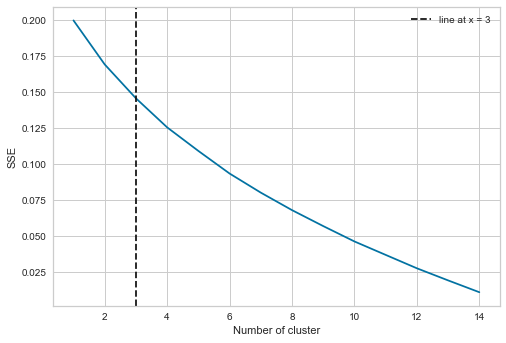

In [500]:
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000).fit(bos_grouped_clustering)
    bos_grouped_clustering["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.axvline(x=3, color='k', linestyle='--',label='line at x = 3')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.legend()
plt.show()

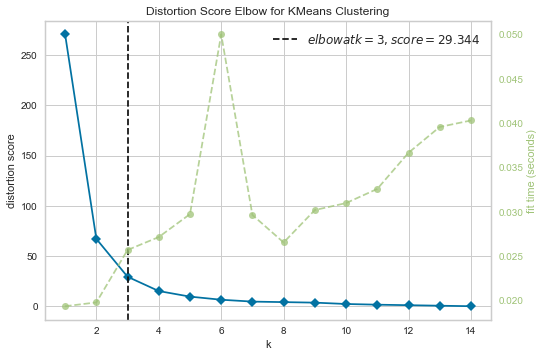

In [501]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15))

visualizer.fit(bos_grouped_clustering) # Fit the data to the visualizer
visualizer.show()  

While the first elbow plot doesn't seem to create an elbow, the second elbow plot shows that the best number of elbows should be 3.

Let's fit the data using 3 clusters.

In [502]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0).fit(bos_grouped_clustering)
kmeans.labels_[0:10]

array([0, 2, 2, 1, 1, 1, 2, 1, 0, 0], dtype=int32)

In [503]:
neighborhoods_venues_sorted.drop('Cluster Labels',axis=1, inplace=True)

We add a column for clustering labels(0,1,2) and merge the dataframes to include both top venue categories and geographical information so that we will be able to create geospatial visualization later.

In [504]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

boston_merged = bos_df.iloc[:,:-2]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
boston_merged = boston_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

boston_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,South End,42.347751,-71.068341,0,American Restaurant,Coffee Shop,Theater,Italian Restaurant,Gym,Wine Bar,Performing Arts Venue,Gourmet Shop,Hotel,Park
1,South Boston,42.342830,-71.061036,2,Coffee Shop,American Restaurant,Bakery,Italian Restaurant,Theater,Wine Bar,Asian Restaurant,Pizza Place,Pet Store,Chinese Restaurant
2,Bay Village,42.348783,-71.066629,2,Coffee Shop,American Restaurant,Asian Restaurant,Theater,Spa,Chinese Restaurant,Italian Restaurant,Wine Shop,Hotel,Pizza Place
3,Charlestown,42.390512,-71.074160,1,Brewery,Bakery,Pizza Place,Gastropub,Gym,Clothing Store,Sporting Goods Shop,Cosmetics Shop,Department Store,Pub
4,Back Bay,42.356917,-71.075689,2,Spa,Italian Restaurant,Ice Cream Shop,Gourmet Shop,Hotel,Plaza,Bakery,Park,Jewelry Store,Coffee Shop


In [505]:
boston_merged

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,South End,42.347751,-71.068341,0,American Restaurant,Coffee Shop,Theater,Italian Restaurant,Gym,Wine Bar,Performing Arts Venue,Gourmet Shop,Hotel,Park
1,South Boston,42.342830,-71.061036,2,Coffee Shop,American Restaurant,Bakery,Italian Restaurant,Theater,Wine Bar,Asian Restaurant,Pizza Place,Pet Store,Chinese Restaurant
2,Bay Village,42.348783,-71.066629,2,Coffee Shop,American Restaurant,Asian Restaurant,Theater,Spa,Chinese Restaurant,Italian Restaurant,Wine Shop,Hotel,Pizza Place
3,Charlestown,42.390512,-71.074160,1,Brewery,Bakery,Pizza Place,Gastropub,Gym,Clothing Store,Sporting Goods Shop,Cosmetics Shop,Department Store,Pub
4,Back Bay,42.356917,-71.075689,2,Spa,Italian Restaurant,Ice Cream Shop,Gourmet Shop,Hotel,Plaza,Bakery,Park,Jewelry Store,Coffee Shop
5,Allston,42.346015,-71.135174,0,Bakery,Chinese Restaurant,Gastropub,Mexican Restaurant,Korean Restaurant,Sushi Restaurant,Pizza Place,Bar,Ice Cream Shop,Liquor Store
6,Fenway,42.352080,-71.110109,0,Pizza Place,Gym / Fitness Center,Coffee Shop,Grocery Store,Chinese Restaurant,Bakery,Mexican Restaurant,Yoga Studio,Japanese Restaurant,Pub
7,Beacon Hill,42.361187,-71.071409,1,Science Museum,American Restaurant,Hotel,Hotel Bar,Italian Restaurant,Playground,Gym / Fitness Center,Pizza Place,Bar,Park
8,Leather District,42.349831,-71.058378,1,Chinese Restaurant,Asian Restaurant,Bakery,Coffee Shop,Italian Restaurant,American Restaurant,Gym / Fitness Center,Sushi Restaurant,Sandwich Place,Theater
9,East Boston,42.393939,-70.995463,1,Italian Restaurant,Pizza Place,Hotel,Sandwich Place,Beach,Ice Cream Shop,Chinese Restaurant,Donut Shop,American Restaurant,Coffee Shop


In [506]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(3)
ys = [i + x + (i*x)**2 for i in range(3)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(boston_merged['Latitude'], boston_merged['Longitude'], boston_merged['Neighborhood'], boston_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Cluster 1

In [507]:
boston_merged.loc[boston_merged['Cluster Labels'] == 0, boston_merged.columns[[0] + list(range(4, boston_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,South End,American Restaurant,Coffee Shop,Theater,Italian Restaurant,Gym,Wine Bar,Performing Arts Venue,Gourmet Shop,Hotel,Park
5,Allston,Bakery,Chinese Restaurant,Gastropub,Mexican Restaurant,Korean Restaurant,Sushi Restaurant,Pizza Place,Bar,Ice Cream Shop,Liquor Store
6,Fenway,Pizza Place,Gym / Fitness Center,Coffee Shop,Grocery Store,Chinese Restaurant,Bakery,Mexican Restaurant,Yoga Studio,Japanese Restaurant,Pub
12,South Boston Waterfront,Seafood Restaurant,Hotel,Park,Italian Restaurant,Steakhouse,Coffee Shop,Gym,Bakery,Bar,Brewery
13,Harbor Islands,Beach,Park,Seafood Restaurant,Chinese Restaurant,Breakfast Spot,Lighthouse,Bakery,Scenic Lookout,Bar,Diner
14,Longwood,Pizza Place,Coffee Shop,Café,Donut Shop,Sandwich Place,American Restaurant,Middle Eastern Restaurant,Art Museum,Art Gallery,Park


### Cluster 2

In [508]:
boston_merged.loc[boston_merged['Cluster Labels'] == 1, boston_merged.columns[[0] + list(range(4, boston_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Charlestown,Brewery,Bakery,Pizza Place,Gastropub,Gym,Clothing Store,Sporting Goods Shop,Cosmetics Shop,Department Store,Pub
7,Beacon Hill,Science Museum,American Restaurant,Hotel,Hotel Bar,Italian Restaurant,Playground,Gym / Fitness Center,Pizza Place,Bar,Park
8,Leather District,Chinese Restaurant,Asian Restaurant,Bakery,Coffee Shop,Italian Restaurant,American Restaurant,Gym / Fitness Center,Sushi Restaurant,Sandwich Place,Theater
9,East Boston,Italian Restaurant,Pizza Place,Hotel,Sandwich Place,Beach,Ice Cream Shop,Chinese Restaurant,Donut Shop,American Restaurant,Coffee Shop
10,Chinatown,Chinese Restaurant,Coffee Shop,Asian Restaurant,Bakery,Sandwich Place,Sushi Restaurant,Gym / Fitness Center,Mexican Restaurant,Pizza Place,Vegetarian / Vegan Restaurant
11,West Roxbury,Italian Restaurant,American Restaurant,Ice Cream Shop,Pizza Place,Gym / Fitness Center,Park,Burger Joint,Gym,Greek Restaurant,Chinese Restaurant


### Cluster 3

In [509]:
boston_merged.loc[boston_merged['Cluster Labels'] == 2, boston_merged.columns[[0] + list(range(4, boston_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,South Boston,Coffee Shop,American Restaurant,Bakery,Italian Restaurant,Theater,Wine Bar,Asian Restaurant,Pizza Place,Pet Store,Chinese Restaurant
2,Bay Village,Coffee Shop,American Restaurant,Asian Restaurant,Theater,Spa,Chinese Restaurant,Italian Restaurant,Wine Shop,Hotel,Pizza Place
4,Back Bay,Spa,Italian Restaurant,Ice Cream Shop,Gourmet Shop,Hotel,Plaza,Bakery,Park,Jewelry Store,Coffee Shop
15,Dorchester,Coffee Shop,Bar,Sandwich Place,Italian Restaurant,American Restaurant,Pizza Place,Liquor Store,Gym / Fitness Center,New American Restaurant,Gym


After conducting k-means clustering, cluster 2 shows the **most populated neighborhoods** with Asian restaurants, Italian restaurants and American restaurants. In other words, opening new restaurants in these regions appears quite competitive and economic profits are not gauranteed. Though the top common venues suggest the local preferences for dining and the local ethnic diversity, customers however are more likely to be attracted to many competitors restaurants and the profit share will be even out.

Compared to cluster 2, **cluster 1 and 3** are more ideal regions for opening new restaurants. In particular, their top common venues could **help improve and complement** the local dining activities. These facilities are coffee shop, brewery, pizza place, beach, museum, park or spa. After spending time at these places, people will find the surrounding restaurants as supportive or suitable to gain energy and take a rest. People can also enjoy the change of taste. For example, if people are tired of the common bakery for afternoon tea or western restaurants for dining or seafood, Asian foreign restaurant will certainly be a more attractive, creative option for dining.

For those neighborhoods with lower ratings for Asian restaurants(average rating<=7.5), we will examine their top venues to see **if non-Asian restaurants are common and competitive(popular)**, or if a opening a restaurant itself will be a potentially **less competitive business decision. (restaurant or eatery is not even the top local venue.**)

In [514]:
bos_dff=asian_rest_bos[asian_rest_bos['Average Rating']<=7.5].sort_values(['Average Rating'],ascending=False)
bos_dff.reset_index(inplace=True)
bos_dff=bos_dff.iloc[:,1:]
bos_dff

,Neighborhood,Latitude,Longitude,Average Rating
0,Mission Hill,42.335770,-71.090434,7.475
1,Hyde Park,42.272114,-71.125881,7.400
2,Roslindale,42.272013,-71.125927,7.360
3,Mattapan,42.293165,-71.096331,7.100
4,Roxbury,42.293233,-71.096460,7.100
5,Jamaica Plain,42.326102,-71.104992,7.000


In [515]:
bos_venuess = getNearbyVenues(names=bos_dff['Neighborhood'],
                                   latitudes=bos_dff['Latitude'],
                                   longitudes=bos_dff['Longitude']
                                  )

Mission Hill
Hyde Park
Roslindale
Mattapan
Roxbury
Jamaica Plain


After calling getNearbyVenues, we get 100 venues for each of the 6 neighborhoods.

In [516]:
print(bos_venuess.shape)
bos_venuess.head()

(599, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mission Hill,42.33577,-71.090434,Museum of Fine Arts,42.339449,-71.094093,Art Museum
1,Mission Hill,42.33577,-71.090434,Chicken Lou's,42.339196,-71.090430,Sandwich Place
2,Mission Hill,42.33577,-71.090434,Art of the Americas @ MFA,42.339693,-71.093940,Art Gallery
3,Mission Hill,42.33577,-71.090434,Tatte Bakery and Cafe,42.339985,-71.090477,Bakery
4,Mission Hill,42.33577,-71.090434,Isabella Stewart Gardner Museum,42.338097,-71.098974,Art Museum


In [517]:
bos_venuess.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Hyde Park,100,100,100,100,100,100
Jamaica Plain,99,99,99,99,99,99
Mattapan,100,100,100,100,100,100
Mission Hill,100,100,100,100,100,100
Roslindale,100,100,100,100,100,100
Roxbury,100,100,100,100,100,100


In [518]:
print('There are {} unique venue categories.'.format(len(bos_venuess['Venue Category'].unique())))

There are 120 unique venue categories.


We will apply one hot encoding to create dummy variable columns for each venue category and compute each category's average frequency for each neighborhood as we did before.

In [519]:
# one hot encoding
bos_onehott = pd.get_dummies(bos_venuess[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bos_onehott['Neighborhood'] = bos_venuess['Neighborhood'] 

# move neighborhood column to the first column
bos_onehott.set_index('Neighborhood', inplace=True)
bos_onehott.reset_index(inplace=True)
bos_onehott.head()

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Big Box Store,Board Shop,Bookstore,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Church,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cuban Restaurant,Deli / Bodega,Department Store,Diner,Discount Store,Donut Shop,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Flower Shop,Food & Drink Shop,Food Truck,Furniture / Home Store,Garden,Gastropub,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hockey Arena,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Latin American Restaurant,Liquor Store,Marijuana Dispensary,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Nail Salon,New American Restaurant,Nightclub,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Record Shop,Rental Service,Restaurant,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoothie Shop,Snack Place,Soccer Field,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Track,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,Mission Hill,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Mission Hill,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Mission Hill,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Mission Hill,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Mission Hill,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [520]:
bos_groupedd=bos_onehott.groupby('Neighborhood').mean().reset_index()
bos_groupedd

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Big Box Store,Board Shop,Bookstore,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Café,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Church,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cuban Restaurant,Deli / Bodega,Department Store,Diner,Discount Store,Donut Shop,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Flower Shop,Food & Drink Shop,Food Truck,Furniture / Home Store,Garden,Gastropub,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hockey Arena,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Latin American Restaurant,Liquor Store,Marijuana Dispensary,Market,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Nail Salon,New American Restaurant,Nightclub,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Record Shop,Rental Service,Restaurant,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoothie Shop,Snack Place,Soccer Field,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Track,Trail,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,Hyde Park,0.00,0.000000,0.070000,0.00,0.000000,0.000000,0.00,0.00,0.01,0.00,0.000000,0.040000,0.020000,0.00,0.00,0.00,0.010000,0.00,0.000000,0.00,0.01,0.010000,0.00,0.010000,0.01,0.01,0.000000,0.00,0.000000,0.020000,0.00,0.000000,0.000000,0.01,0.01,0.01,0.03,0.030000,0.000000,0.000000,0.000000,0.01,0.010000,0.010000,0.00,0.00,0.01,0.00,0.00,0.000000,0.01,0.01,0.040000,0.010000,0.01,0.00,0.00,0.01,0.000000,0.040000,0.02,0.060000,0.00,0.00,0.010000,0.030000,0.000000,0.00,0.02,0.030000,0.01,0.01,0.01,0.000000,0.01,0.010000,0.00,0.010000,0.00,0.00,0.060000,0.050000,0.000000,0.01,0.01,0.01,0.010000,0.01,0.00,0.01,0.010000,0.020000,0.00,0.00,0.000000,0.000000,0.010000,0.00,0.00,0.00,0.010000,0.01,0.000000,0.000000,0.000000,0.00,0.01,0.000000,0.000000,0.01,0.01,0.01,0.000000,0.01,0.000000,0.000000,0.01,0.00,0.00,0.00
1,Jamaica Plain,0.00,0.010101,0.030303,0.00,0.010101,0.010101,0.00,0.00,0.00,0.00,0.010101,0.010101,0.010101,0.00,0.00,0.00,0.020202,0.00,0.020202,0.00,0.00,0.010101,0.00,0.010101,0.00,0.00,0.020202,0.00,0.010101,0.030303,0.00,0.020202,0.020202,0.00,0.00,0.00,0.00,0.040404,0.010101,0.010101,0.020202,0.00,0.010101,0.020202,0.00,0.00,0.00,0.00,0.00,0.020202,0.00,0.00,0.020202,0.050505,0.00,0.00,0.00,0.00,0.010101,0.020202,0.00,0.050505,0.00,0.00,0.020202,0.030303,0.010101,0.00,0.00,0.030303,0.00,0.00,0.00,0.010101,0.00,0.020202,0.00,0.060606,0.00,0.00,0.020202,0.060606,0.010101,0.00,0.00,0.00,0.020202,0.00,0.00,0.00,0.030303,0.010101,0.00,0.00,0.010101,0.010101,0.010101,0.00,0.00,0.00,0.020202,0.00,0.010101,0.010101,0.010101,0.00,0.00,0.010101,0.010101,0.00,0.00,0.00,0.010101,0.00,0.010101,0.010101,0.00,0.00,0.00,0.00
2,Mattapan,0.02,0.000000,0.060000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.01,0.010000,0.050000,0.020000,0.00,0.01,0.00,0.010000,0.02,0.030000,0.00,0.00,0.000000,0.00,0.000000,0.03,0.01,0.000000,0.00,0.000000,0.040000,0.00,0.000000,0.010000,0.01,0.00,0.00,0.00,0.010000,0.000000,0.000000,0.000000,0.00,0.020000,0.000000,0.01,0.01,0.01,0.00,0.00,0.000000,0.01,0.01,0.000000,0.010000,0.03,0.01,0.00,0.02,0.000000,0.050000,0.01,0.030000,0.00,0.00,0.000000,0.020000,0.000000,0.01,0.00,0.030000,0.00,0.00,0.01,0.000000,0.00,0.020000,0.01,0.040000,0.00,0.01,0.020000,0.030000,0.000000,0.00,0.01,0.01,0.020000,0.01,0.01,0.02,0.020000,0.020000,0.00,0.00,

In [521]:
bos_groupedd.shape

(6, 121)

Including neighborhood as a column, the dataframe has 121 columns and 6 unique neighborhoods.

Next, we will sort the top 5 common venues for these low rated neighborhoods.

In [522]:
num_top_venues = 5

for hood in bos_groupedd['Neighborhood']:
    print("----"+hood+"----")
    temp = bos_groupedd[bos_groupedd['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Hyde Park----
                 venue  freq
0  American Restaurant  0.07
1             Pharmacy  0.06
2   Italian Restaurant  0.06
3          Pizza Place  0.05
4       Ice Cream Shop  0.04


----Jamaica Plain----
                venue  freq
0         Pizza Place  0.06
1                Park  0.06
2  Italian Restaurant  0.05
3                 Gym  0.05
4          Donut Shop  0.04


----Mattapan----
                 venue  freq
0  American Restaurant  0.06
1       Ice Cream Shop  0.05
2               Bakery  0.05
3                 Park  0.04
4          Coffee Shop  0.04


----Mission Hill----
                 venue  freq
0                 Café  0.07
1       Sandwich Place  0.05
2          Pizza Place  0.05
3  American Restaurant  0.04
4         Concert Hall  0.04


----Roslindale----
                 venue  freq
0  American Restaurant  0.07
1   Italian Restaurant  0.06
2             Pharmacy  0.06
3          Pizza Place  0.05
4       Ice Cream Shop  0.04


----Roxbury----
             

We also look at the top 10 common venues for each neighborhood to confirm our finding that the top common venues are all related to American or western restaurants.

In [523]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sortedd = pd.DataFrame(columns=columns)
neighborhoods_venues_sortedd['Neighborhood'] = bos_groupedd['Neighborhood']

for ind in np.arange(bos_groupedd.shape[0]):
    neighborhoods_venues_sortedd.iloc[ind, 1:] = return_most_common_venues(bos_groupedd.iloc[ind, :], num_top_venues)

neighborhoods_venues_sortedd.head(50)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Hyde Park,American Restaurant,Italian Restaurant,Pharmacy,Pizza Place,Ice Cream Shop,Bakery,Grocery Store,Discount Store,Liquor Store,Mexican Restaurant
1,Jamaica Plain,Pizza Place,Park,Gym,Italian Restaurant,Donut Shop,American Restaurant,Sandwich Place,Liquor Store,Coffee Shop,Mexican Restaurant
2,Mattapan,American Restaurant,Ice Cream Shop,Bakery,Coffee Shop,Park,Brewery,Caribbean Restaurant,Pizza Place,Gym / Fitness Center,Italian Restaurant
3,Mission Hill,Café,Sandwich Place,Pizza Place,American Restaurant,Middle Eastern Restaurant,Concert Hall,Italian Restaurant,Art Museum,Thai Restaurant,Coffee Shop
4,Roslindale,American Restaurant,Italian Restaurant,Pharmacy,Pizza Place,Ice Cream Shop,Bakery,Grocery Store,Discount Store,Liquor Store,Mexican Restaurant
5,Roxbury,American Restaurant,Ice Cream Shop,Bakery,Coffee Shop,Park,Brewery,Caribbean Restaurant,Pizza Place,Gym / Fitness Center,Italian Restaurant


The sorted dataframe shows that the top common venues are all western restaurants. **Because these neighborhoods have low average ratings for Asian restaurants(<7.5)**, the local preferences for dining are more domestic instead of diverse. **Opening a new Asian restaurant can be a risky business decision, since the local customers don't seem to prefer non-Western cuisine as their dining option.**

## Results and Decision
### Results
In this section, we will document all the findings from the data analysis and visualization. The essential business question we started off is to identify a suitable neighborhood to open a new Asian restaurant. We examined the distribution of Asian restaurants in each neighborhood in terms of frequency and location. We analyzed the average popularity for Asian restaurant cuisine for each neighborhood using ratings/likes/tips as metrics. We also performed data wrangling by creating, cleaning and sorting dataframes to build geospatial visualization(folium map and heat map). We used the average rating as a key separator for highly rated and low rated neighborhoods to conduct further analysis using k-means clustering. We identified the regions/cluster of neighborhoods suitable for opening new Asian restaurants and even examined the top venue categories within each cluster before making business recommendations.
* Among the total of 25 neighborhoods, 22 of them have local Asian restaurants.
* The top 5 neighborhoods with the most number of Asian restaurants are: **Chinatown, Leather Strict, Allston, Bay Village and South Boston. They are the highly populated regions for Asian restaurants.**
* The top neighborhoods with highest average ratings are (>8.0): **South End, South Boston, Bay Village, Charlestown, and Allston.**
* Using the **heat map** visualization tool, we can approximately identify the regions with highly rated restaurants: Allston, Fenway, Back Bay, South End, South Boston, Charlestown and East Boston.
* After sorting the dataframe, **Bay Village and Fenway** have individual restaurants with highest rating, tips and likes.
* 16 highly rated neighborhoods have average rating of 7.5 and not all of their top common venues are restaurants-related.
* The top common venues are restaurants, coffee stop, bakery, brewery, park, beach, museum, spa, American or Italian restaurants.
* Using k-means clustering, 3 clusters are identified.
* **Clusters 1 and 3** are generally recommended regions for opening restaurants, since the top common venues for those neighborhoods are **complementary and supportive for restaurants dining**. The venues include coffee stop, bakery, brewery, park, beach, museum, and spa. In other words, restaurants in these neighborhoods are **not as competitive** as the populated neighborhoods. Because these neighborhoods are also highly rated for Asian restaurants, the local customers still prefer Asian cuisine and these restaurants can still easily attract customers.
* **Within the clusters, the recommended neighborhoods are: South End, Allston, Fenway, South Boston Waterfront, Harbor Islands, Longwood, South Boston, Bay Village, Back Bay and Dorchester.**
* For those neighborhoods with average rating less than 7.5, their top common venues are non-Asian restaurants. Their popular economic activities are still dining/restaurant-related. This means that the local preferences are western cuisine, and opening Asian restaurants to attract local customers isn't as ideal.
* The following neighborhoods are therefore **not recommended: Hyde Park, Jamaica Plain, Mattapan, Mission Hill, Roslindale and Roxbury.**

**In summary, the business recommendations are based on the number of Asian restaurants, high ratings of Asian restaurants(available online customer feedback) and less possibility of competitions.**

### Discussion
According to the analysis, South End has the highest average rating for Asian restaurant, and is one of the least populated competitive neighborhood for opening new Asian restaurant based on K-means clustering. From the geospatial visualization, South End is located around the populated neighborhoods for Asian restaurants such as Chinatown, Leather District Bay Village and South Boston, and this location can benefit from high customer visit possibility. Because Asian restaurants is not the top common venue within the neighborhood, South End could potentially be a ideal choice for starting a new Asian restaurants to attract nearby customers and to experience less competitions. As similarly ideal choices, most neighborhoods from Cluster 1 and Cluster 3 could also be less competitive but are highly rated for opening quality Asian restaurants. 

There are some drawbacks of this analysis. As the main data source, Foursquare API data is not gauranteed to be up-to-date. Though 22 of 25 neighborhoods have available data, it doesn't mean that the 3 neighborhoods actually do not have any available Asian restaurants located. The analysis procedure is step-by-step and appropriate, but the results might be inaccurate and less comprehensive. If more similar online API interfaces are introduced for gathering local venue data, we could certainly compare the quantity and quality of multiple data sources and select the most comprehensive data source to improve the results. Yet this analysis so far has provided us with a lot of insightful, detailed findings as summarized in the Results section, and could be a important cornerstone for answering the business problem of identifying neighborhoods for opening new Asian restaurants.



## Conclusion
The purpose of this project was to identify the best neighborhoods for opening Asian restaurants in Boston. The business recommendation is based on the local average ratings and low number of surrounding Asian restaurants(an indicator of local competitiveness). First, we gathered necessary geographical and venue data from online geojson file and foursquare API. We then performed data wrangling to clean and extract relevant information to build pandas dataframes. Using data sorting, we were able to get the top neighborhoods with the most number of Asian restaurants and those neighborhoods with the high average ratings. We also performed exploratory data analysis to get descriptive statistics and basic visualization to obtain an overview of the data. We created the geospatial visualizations such as Folium map and Heat map to display the geographical center of each neighborhood on the city map and display the popularity density using the sorted average ratings. We organized the data and ranked each neighborhood's common venue category. More importantly, we applied K-means clustering to group the neighborhoods based on their common venue categories, and identify multiple choices and the best choice of the neighborhood for opening Asian restaurant.

The analysis could certainly be improved by using multiple data sources to increase the venue information coverage. Different machine learning algorithm could be used and compared with the performance of K-means clustering. Nevertheless, this analysis procedure is detail-oriented and appropriate to apply on the similar business problem such as opening a new gym, new coffee shop or new school in a given city area. As a comprehensive initial guidance, this capstone project has taken a data-driven approach to solve complex, real-life problem.